In [26]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def setup_logging() -> None:
    logging.basicConfig(
        level=logging.INFO, 
        format='%(asctime)s - %(levelname)s - %(funcName)s | %(message)s',
        handlers=[
            logging.FileHandler('78-ipynb.log')
        ]
    )

    logging.info('Logging setup complete.')

def fetch_df(file_path: str) -> pd.DataFrame:
    logging.info(f'Fetching DataFrame from {file_path}')

    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError as na_error:
        logging.error(f'File not found in {file_path}: {na_error}')
        raise na_error
    except pd.errors.EmptyDataError as empty_error:
        logging.error(f'No data found in {file_path}: {empty_error}')
        raise empty_error
    except pd.errors.ParserError as parse_error:
        logging.error(f'Error parsing data in {file_path}: {parse_error}')
        raise parse_error
    except Exception as e:
        logging.error(f"An unexpected error occurred while reading {file_path}. Error: {e}")
        raise e
    else:
        logging.info(f'Data successfully fetched from {file_path}')
        return df
    
def log_df_info(df: pd.DataFrame) -> None:
    print(f'DataFrame shape: {df.shape}')
    print(f'NaN values: {df.isna().values.any()}')
    print(f'Duplicate: {df.duplicated().values.any()}')
    print(f'Data Types:\n{df.dtypes}')

# Explore and Clean the Data

In [27]:
def clean_df(in_df: pd.DataFrame) -> pd.DataFrame:
    
    # print('Before cleanup')
    # log_df_info(in_df)
    
    in_df.USD_Production_Budget = pd.to_numeric(
        in_df.USD_Production_Budget.replace('[\$,]', '', regex=True), 
        errors='coerce'
    )

    in_df.USD_Worldwide_Gross = pd.to_numeric(
        in_df.USD_Worldwide_Gross.replace('[\$,]', '', regex=True), 
        errors='coerce'
    )

    in_df.USD_Domestic_Gross = pd.to_numeric(
        in_df.USD_Domestic_Gross.replace('[\$,]', '', regex=True), 
        errors='coerce'
    )

    in_df.Release_Date = pd.to_datetime(
        in_df.Release_Date, 
        errors='coerce'
    )

    # print('After cleanup')
    # log_df_info(in_df)

    return in_df

# Investigate films with Zero revenue

In [28]:
def challenge1(in_df: pd.DataFrame) -> None:
    # print(f'Description:\n{in_df.describe()}')
    
    print(f'Average production budget: {in_df.USD_Production_Budget.mean(): .2f}')

    print(f'Average worldwide gross revenue: {in_df.USD_Worldwide_Gross.mean(): .2f}')

    print(f'Minimum worldwide revenue:\n{in_df.loc[in_df.USD_Worldwide_Gross.idxmin()]}')
    print(f'Minimum domestic revenue:\n{in_df.loc[in_df.USD_Domestic_Gross.idxmin()]}')

    print(f'Highest production budget:\n{in_df.loc[in_df.USD_Production_Budget.idxmax()]}')
    print(f'Highest worldwide gross revenue:\n{in_df.loc[in_df.USD_Worldwide_Gross.idxmax()]}')


if __name__ == "__main__":
    setup_logging()

    file_path = 'input-78.csv'
    
    in_df = fetch_df(file_path)
    in_df = clean_df(in_df)

    # challenge1(in_df)

    # challenge 2
    print(f'Films grossed 0 domestic:\n{in_df[in_df.USD_Domestic_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False)}')

    # challenge 3
    print(f'Films grossed 0 worldwide:\n{in_df[in_df.USD_Worldwide_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False)}')

    

Films grossed 0 domestic:
      Rank Release_Date                         Movie_Title  \
5388    96   2020-12-31                         Singularity   
5387   126   2018-12-18                             Aquaman   
5384   321   2018-09-03                   A Wrinkle in Time   
5385   366   2018-10-08                      Amusement Park   
5090   556   2015-12-31  Don Gato, el inicio de la pandilla   
...    ...          ...                                 ...   
4787  5371   2014-12-31                Stories of Our Lives   
3056  5374   2007-12-31                         Tin Can Man   
4907  5381   2015-05-19                    Family Motocross   
5006  5389   2015-09-29             Signed Sealed Delivered   
5007  5390   2015-09-29                A Plague So Pleasant   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5388              175000000                    0                   0  
5387              160000000                    0                   0  
5384

# Filter on Multiple Conditions: International Films

In [29]:
if __name__ == '__main__':
    setup_logging()

    file_path = 'input-78.csv'

    in_df = fetch_df(file_path)
    in_df = clean_df(in_df)

    # international_release = in_df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
    international_release = in_df[(in_df.USD_Domestic_Gross == 0) & (in_df.USD_Worldwide_Gross != 0)]
    print(f'Domestic 0 & Worldwide != 0:\n{international_release}')
    
    # not_released = in_df.query('Release_Date >= "2018-05-01"')
    not_released = in_df[in_df.Release_Date >= pd.to_datetime('2018-05-01')]
    print(f'Not released: {not_released.shape}')

    # released_df = in_df.drop(not_released)
    released_df = in_df[~in_df.index.isin(not_released.index)]

    lost_money = released_df.loc[released_df.USD_Production_Budget > released_df.USD_Worldwide_Gross]
    print(f'Lost money films:\n{lost_money}')
    print(f'Lost percentage: {lost_money.shape[0]/released_df.shape[0]*100: .2f}%')

Domestic 0 & Worldwide != 0:
      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3

# Seaborn Data Visualisation: Bubble Charts

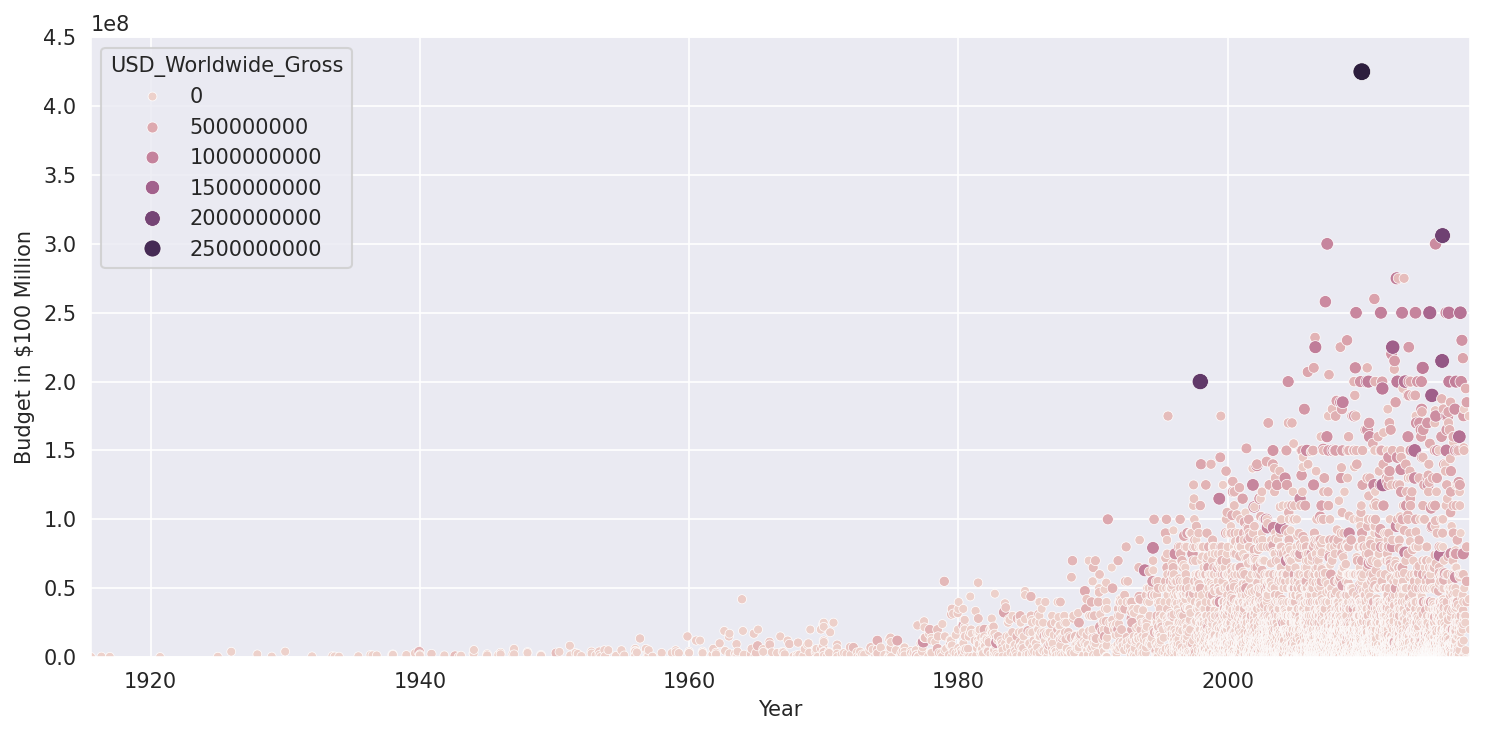

In [46]:
if __name__ == '__main__':
    setup_logging()

    file_path = 'input-78.csv'

    in_df = fetch_df(file_path)
    in_df = clean_df(in_df)

    released_df = in_df[in_df.Release_Date < pd.to_datetime('2018-05-01')]

    plt.figure(
        figsize=(10, 5),
        dpi=150
    )

    with sns.axes_style('darkgrid'):
        scatter_plt = sns.scatterplot(
            data=released_df,
            x='Release_Date', 
            y='USD_Production_Budget',
            hue='USD_Worldwide_Gross',
            size='USD_Worldwide_Gross',
        )
        scatter_plt.set(
            xlabel='Year',
            xlim=(released_df.Release_Date.min(), released_df.Release_Date.max()),
            ylabel='Budget in $100 Million',
            ylim=(0, 450000000)
        )
        # scatter_plt.legend(
        #     loc='center left',
        #     bbox_to_anchor=(1.05, 0.5),
        #     title='Worldwide Gross',
        #     borderaxespad=0
        # )
        plt.tight_layout()

    plt.show()



# Floor Division: A Trick to Convert Years to Decades

In [ ]:
if __name__ == '__main__':
    setup_logging()

    file_path = 'input-78.csv'

    in_df = fetch_df(file_path)
    in_df = clean_df(in_df)

    released_df = in_df[in_df.Release_Date < pd.to_datetime('2018-05-01')]